In [10]:
%matplotlib inline
import os
import re
import numpy as np
import pandas as pd
import scipy.ndimage as ndi
from skimage import measure, io
import matplotlib.pyplot as plt
import mahotas as mh
import matplotlib.mlab as mlab
import matplotlib.ticker as ticker

In [11]:
def save_fig(fig, output_filepath):
    output_path, filename = os.path.split(output_filepath)
        
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    
    plt.tight_layout()
    fig.savefig(output_filepath)

In [12]:
def number(val):
    if val < 1000:
        return '%d' % val
        
    sv = str(val)
    return '$\mathregular{10^{%d}}$' % (len(sv)-2) if val % 10 == 0 else '%0.0e' % val

In [13]:
def get_data_by_type(path, type, unit_scale=1.8):
    if type == 'p':
        data = pd.read_csv(path)['area'] * (unit_scale**3)
    elif type == 'd':
        data = np.load(path).item()
        data = data['diameter']
        data = data * unit_scale * 2
    else:
        return None
    
    return data

In [14]:
def get_result_path(sample_name, input_dir, type='p'):
    if type == 'p':
        return os.path.join(input_dir, sample_name, 'particles_stats', 'particles.csv'.format(sample_name=sample_name))
    else:
        return None

In [29]:
def create_pie_chart(sample_name, input_dir, rngs, title=None, type='p', unit_scale=1.8):
    dpy_path = get_result_path(sample_name, input_dir, type=type)
    df = get_data_by_type(dpy_path, type=type, unit_scale=unit_scale)
    
    print 'Max: {}, Min: {}'.format(df.max(), df.min())
    
    data_ranges = []
    for rng in rngs:
        rng_min, rng_max = rng[0], rng[1]
        data_rng = df[(df > rng_min) & (df < rng_max)]
        data_ranges.append(data_rng)
    
    num_elem = [len(p) for p in data_ranges]
    se = sum(num_elem)

    proc_particles = [n/float(se) * 100.0 for n in num_elem]      
                      
    def get_title(v1, v2):
        return '%s $\minus$ %s $\mathregular{um^3}$' % (number(v1), number(v2))
                      
    titles = [get_title(minv, maxv) for minv,maxv in rngs]
    #colors = ['#1E824C', '#80B584', '#A6CAA9', '#C9DECB', '#E9F1EA'] #green
    #colors = ['#663399', '#AD8BFE', '#C4ABFE', '#BE90D4', '#DDCEFF'] #purple
    colors = ['#23819C', '#2FAACE', '#57BCD9', '#8CD1E6', '#B8E2EF', '#c4f1ff'] #blue
    #colors = ['#ae4900', '#c75400', '#e15e00', '#ff862e', '#ff862e'] #orange
           
    textprops={'fontsize': 55, 'weight': 'normal', 'family': 'sans-serif'}
    pie_width = 0.5
    fig, ax = plt.subplots(figsize=(27,15))
    ax.axis('equal')
    patches, texts, autotexts = ax.pie(proc_particles, \
                                       textprops=textprops, \
                                       colors=colors, \
                                       autopct='%1.1f%%', \
                                       radius=1, \
                                       pctdistance=1-pie_width/2)
    
    plt.setp(patches, \
             width=pie_width, \
             edgecolor='white')
    
#     if title is not None:
#         plt.text(0.5, 0.5, \
#                  title, \
#                  horizontalalignment='center', \
#                  verticalalignment='center', \
#                  weight='bold', \
#                  fontsize=80, \
#                  transform=ax.transAxes)
    
   
    
    plt.legend(patches, titles, loc=(0.71,0.66), fontsize=50)
    
    for t, p in zip(autotexts, proc_particles):
        if p < 2.0:
            pos = list(t.get_position())
            pos[0] = pos[0] + 0.45

            t.set_position(pos)
            
    #plt.show()
    
    #ax.pie(proc_particles, labels=titles, autopct='%d%%', startangle=270)
    #plt.axis('equal')
              
    #series = pd.Series(np.array(proc_particles), index=titles)
    #ax = series.plot.pie(figsize=(6, 6), radius=1, pctdistance=1-width/2, legend=True)
    #plt.show()
    #plt.subplots_adjust(left=-0.9, right=1, top=1, bottom=-0.08)
    #plt.tight_layout()
    save_fig(fig, os.path.join(input_dir, '_'.join([sample_name, title, 'pie']) + '.png'))

Max: 38269490.688, Min: 5.832


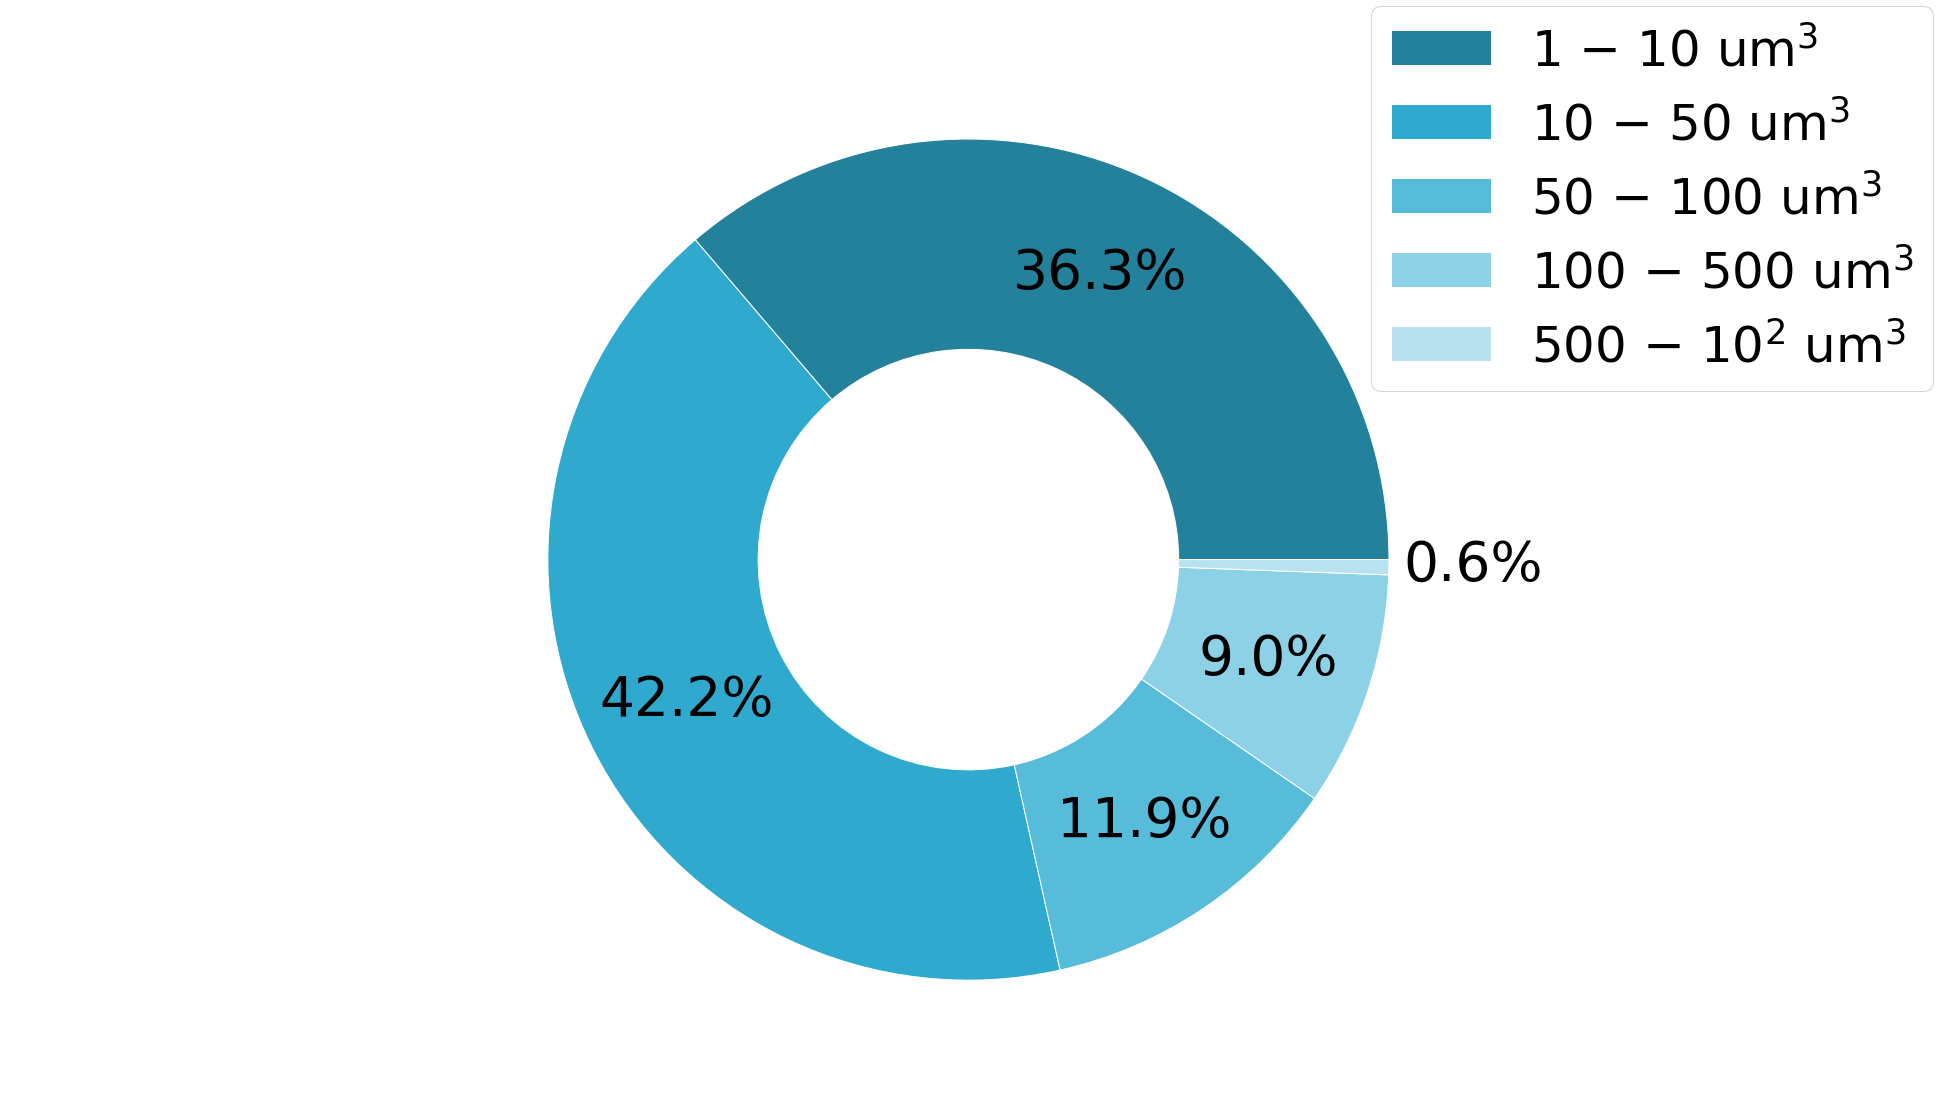

In [44]:
create_pie_chart('B2', './data/heika_bioglass_results', [(1,10),(10,50), (50,100), (100,500), (500,1000)], title='B2', type='p')

Max: 38268662.544, Min: 5.832


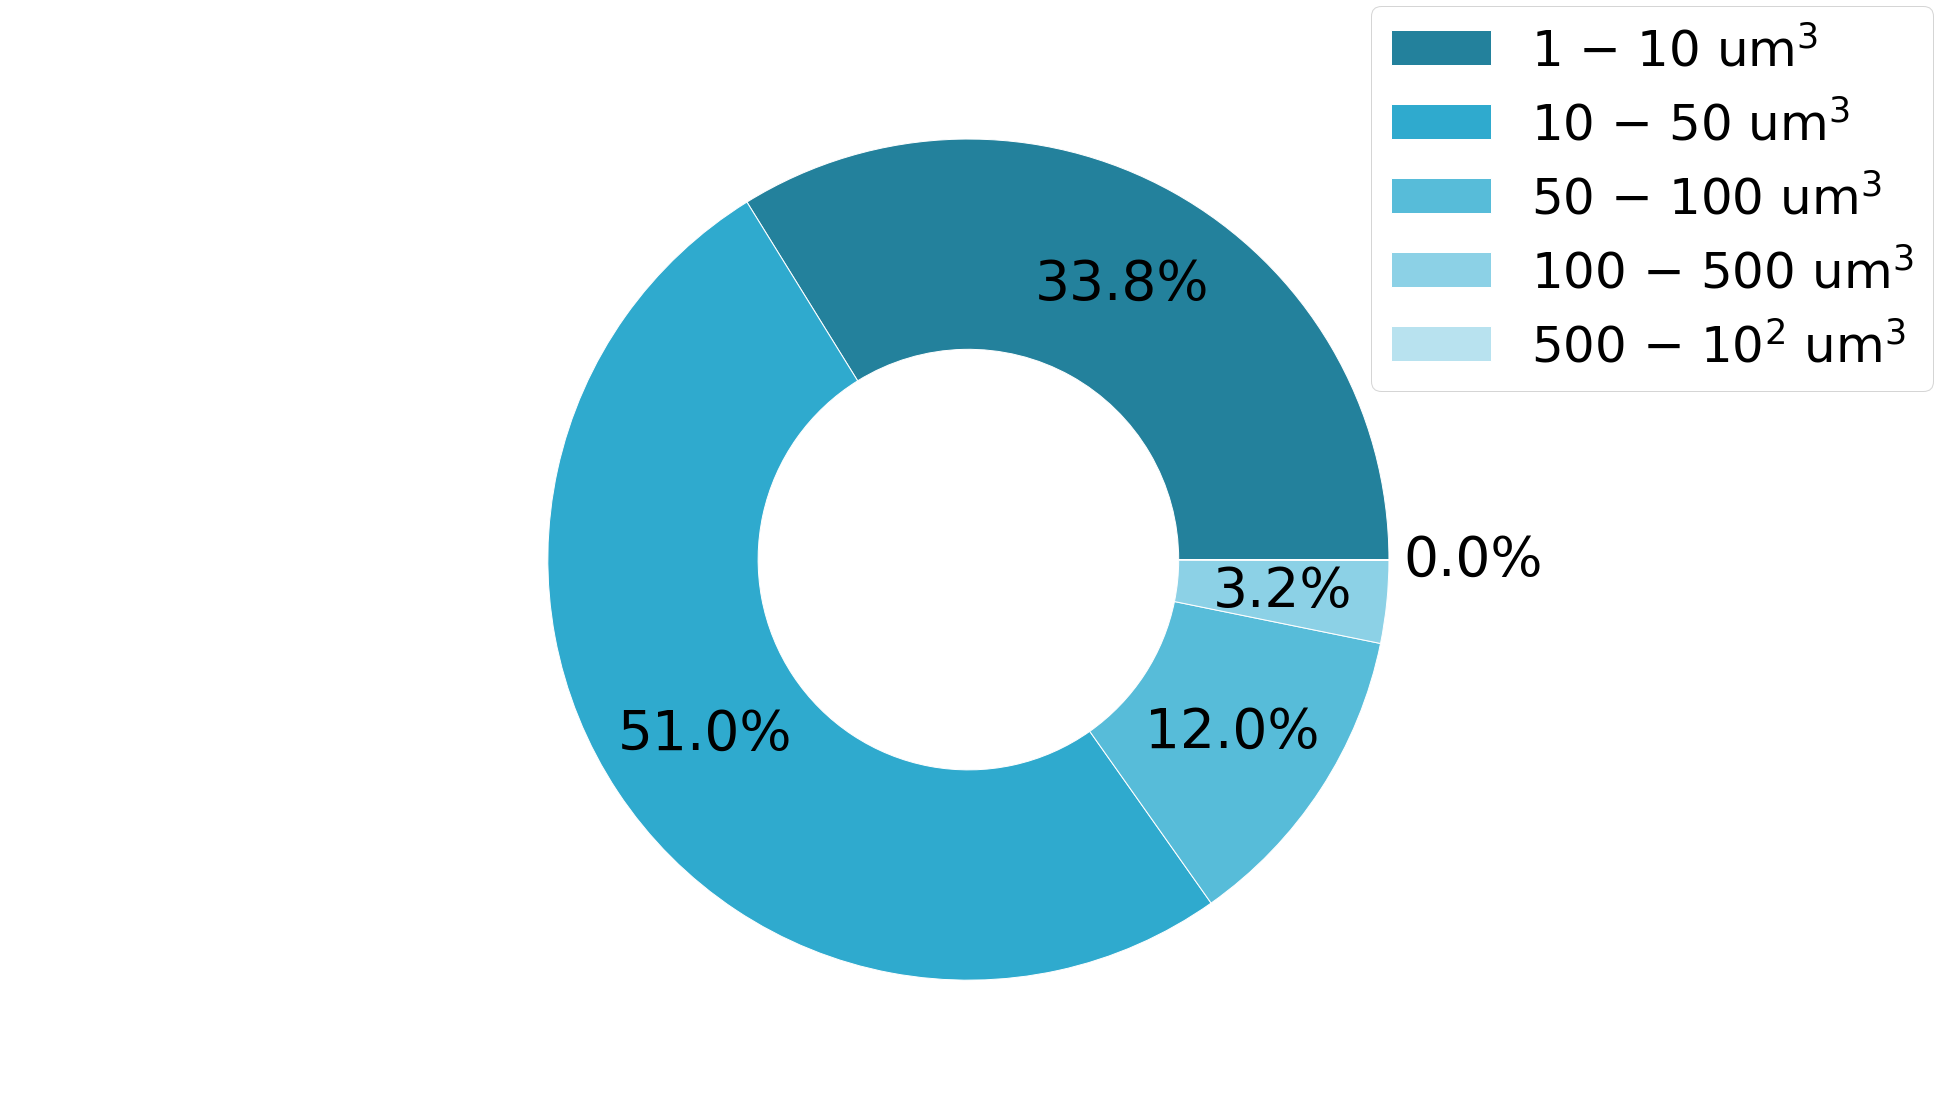

In [46]:
create_pie_chart('B3', './data/heika_bioglass_results', [(1,10),(10,50), (50,100), (100,500), (500,1000)], title='B2', type='p')

Max: 38241567.072, Min: 5.832


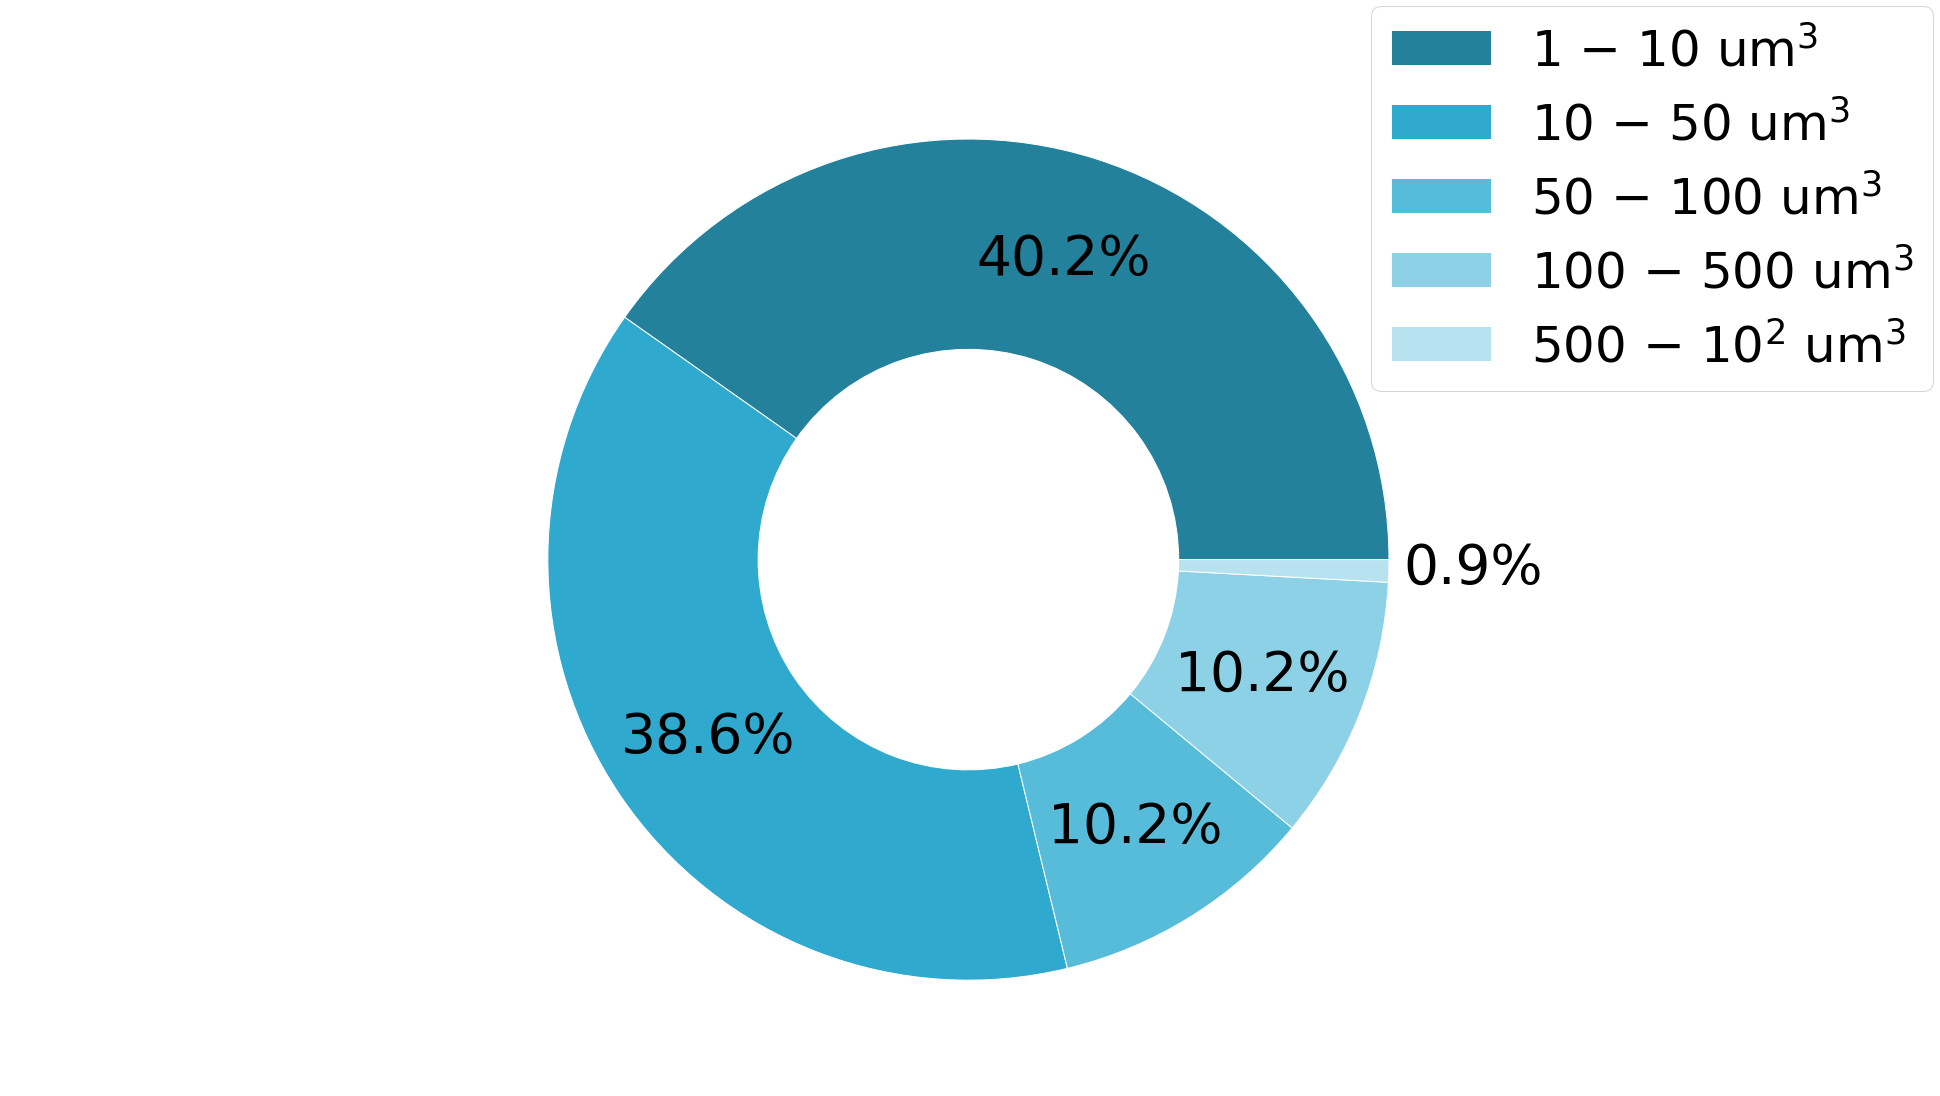

In [45]:
create_pie_chart('B4', './data/heika_bioglass_results', [(1,10),(10,50), (50,100), (100,500), (500,1000)], title='B2', type='p')

Max: 38265734.88, Min: 5.832


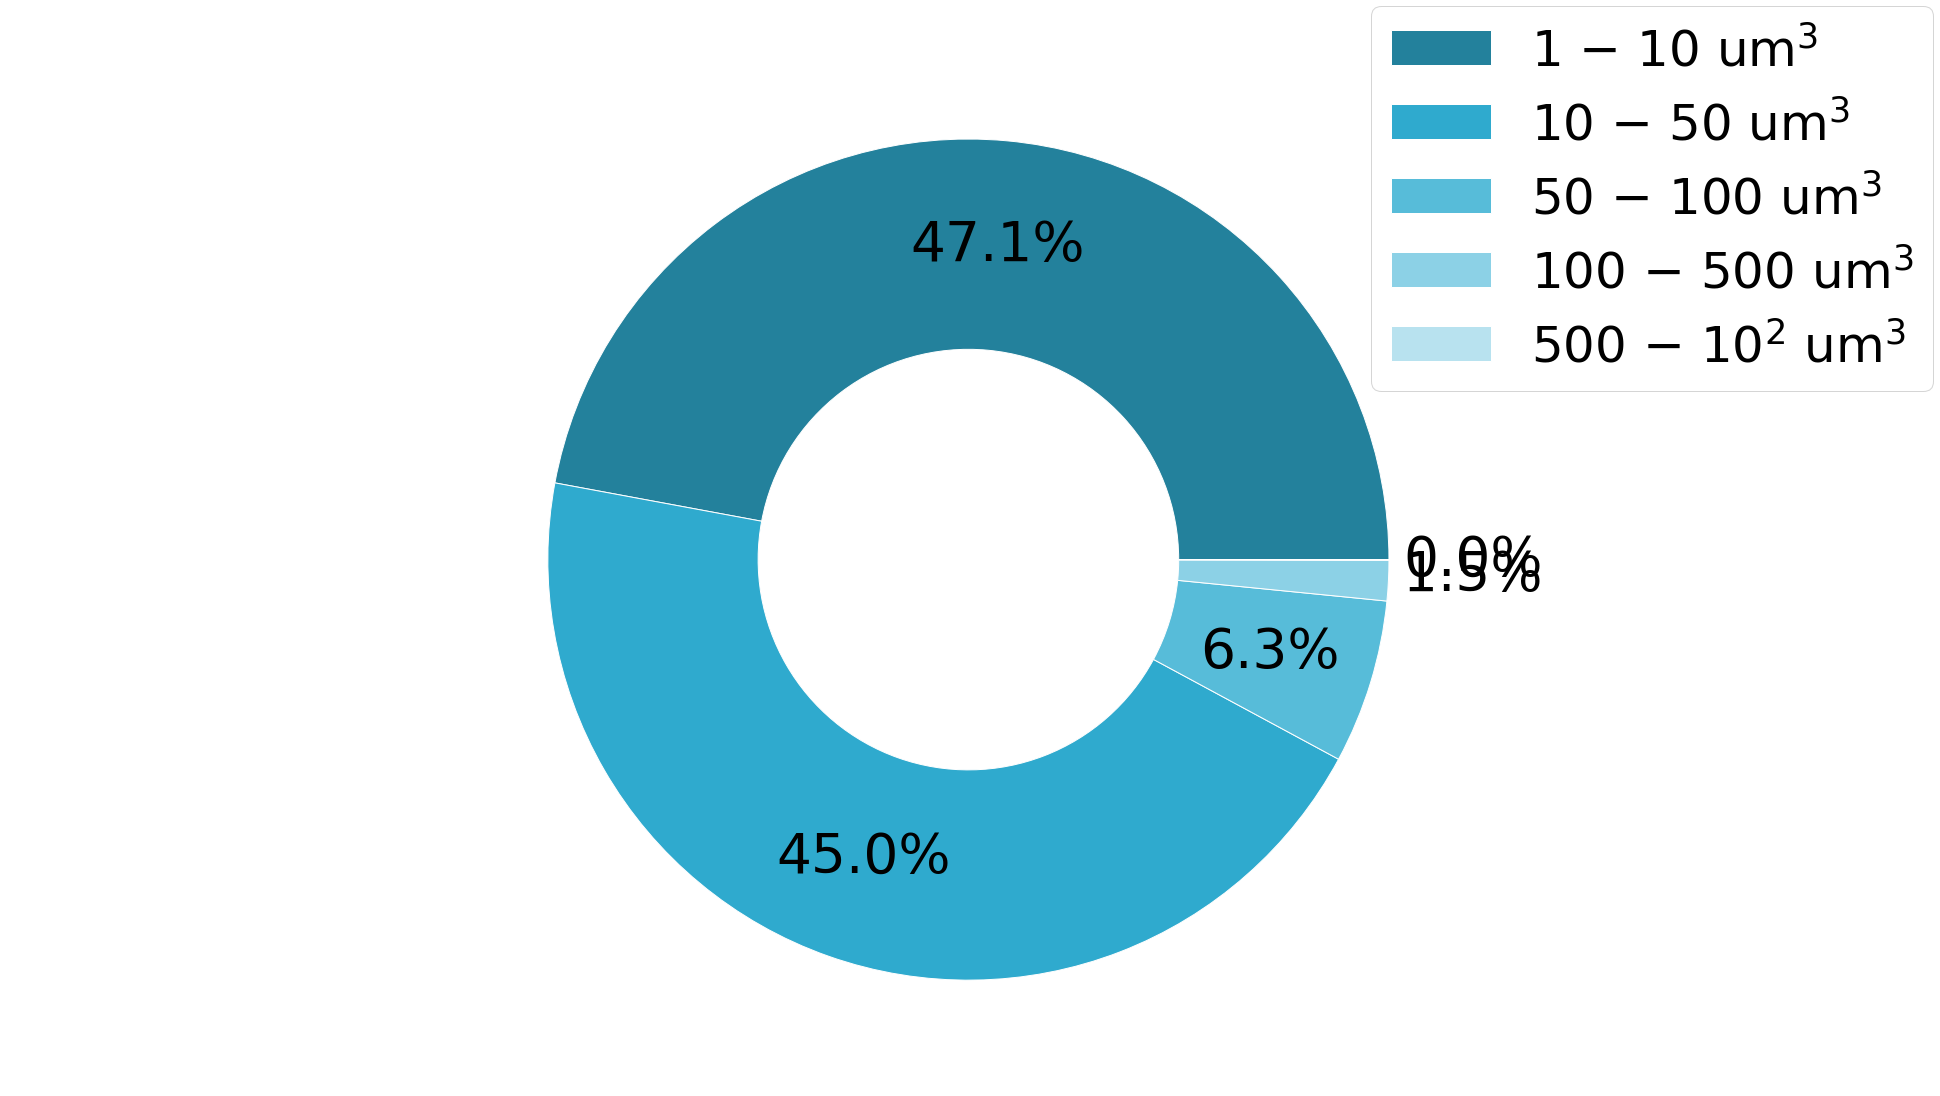

In [47]:
create_pie_chart('B5', './data/heika_bioglass_results', [(1,10),(10,50), (50,100), (100,500), (500,1000)], title='B2', type='p')

# Properly sorted

Max: 76479255.864, Min: 5.832


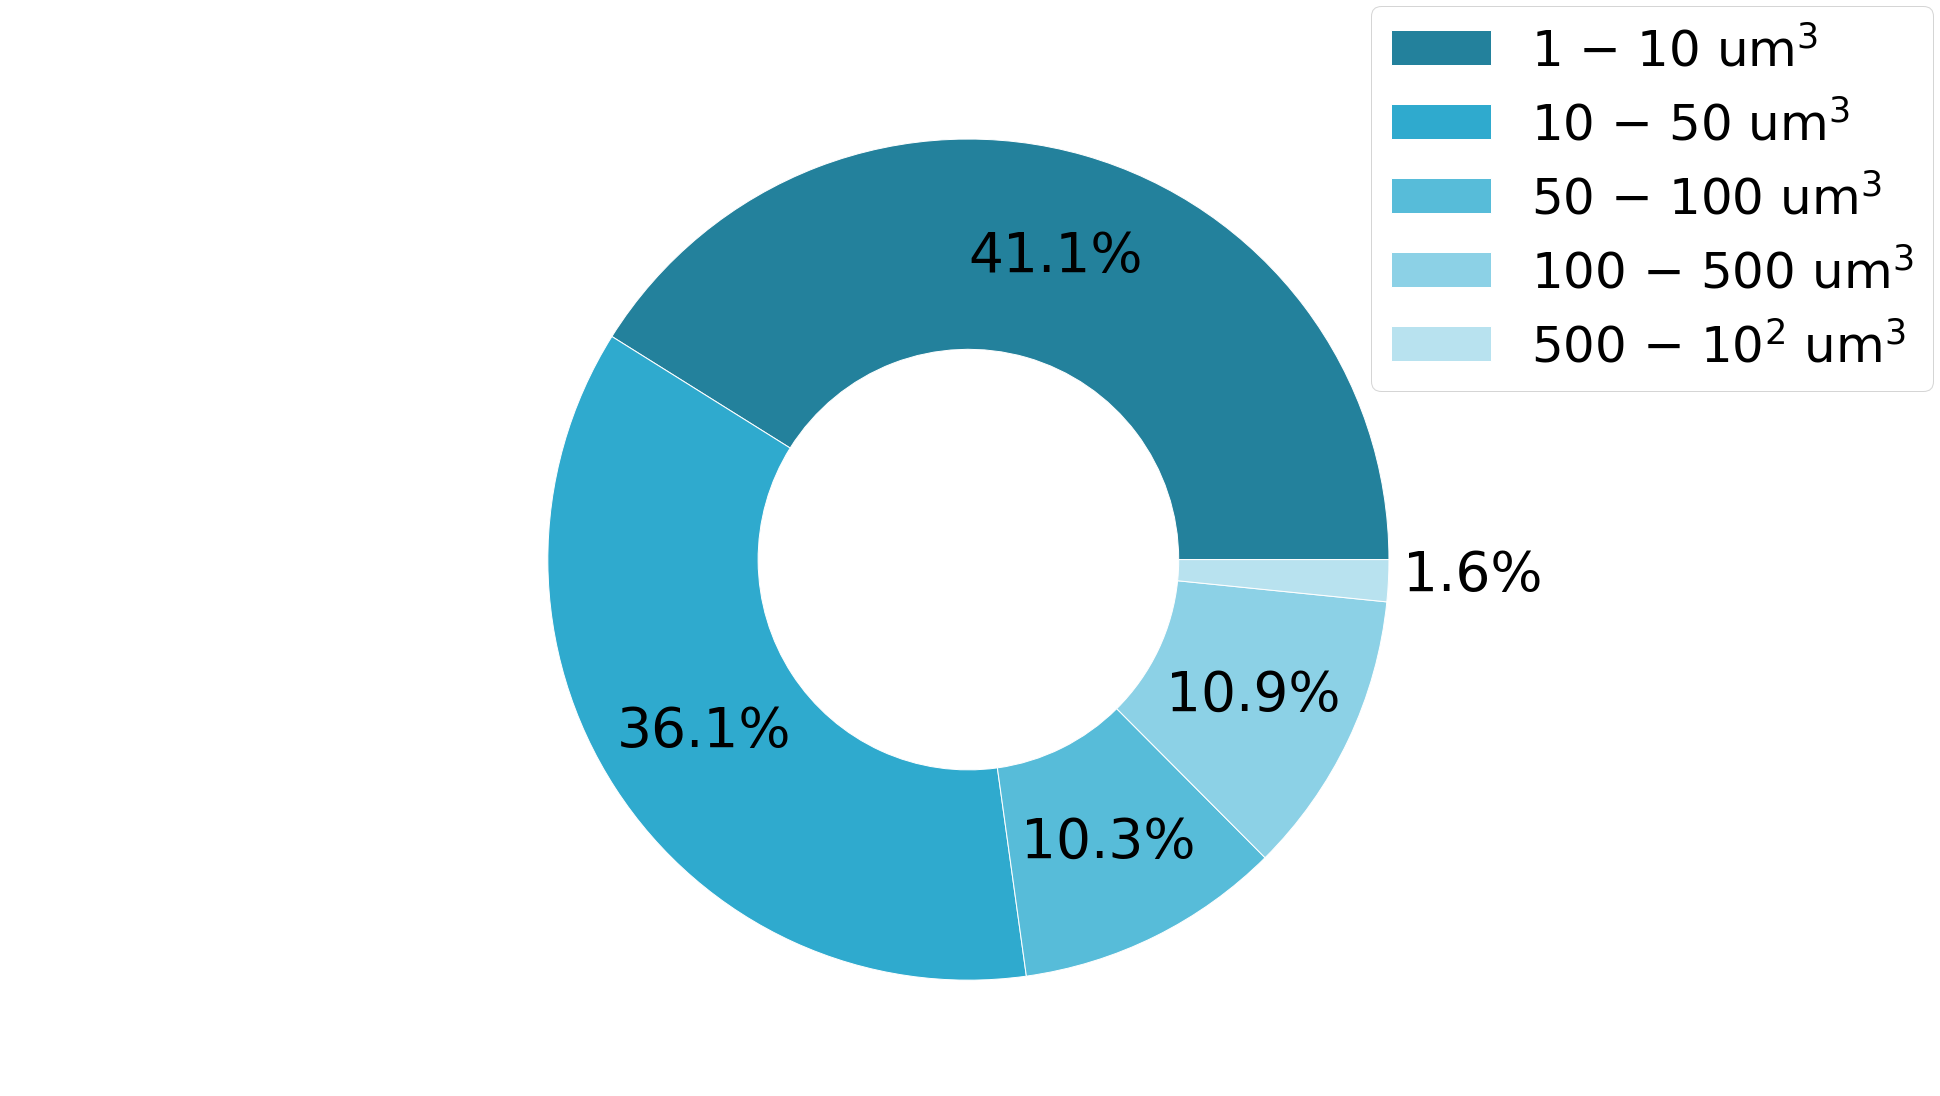

In [56]:
create_pie_chart('B2', './data/heika_bioglass_results', [(1,10),(10,50), (50,100), (100,500), (500,1000)], title='B2', type='p')

Max: 76476975.552, Min: 5.832


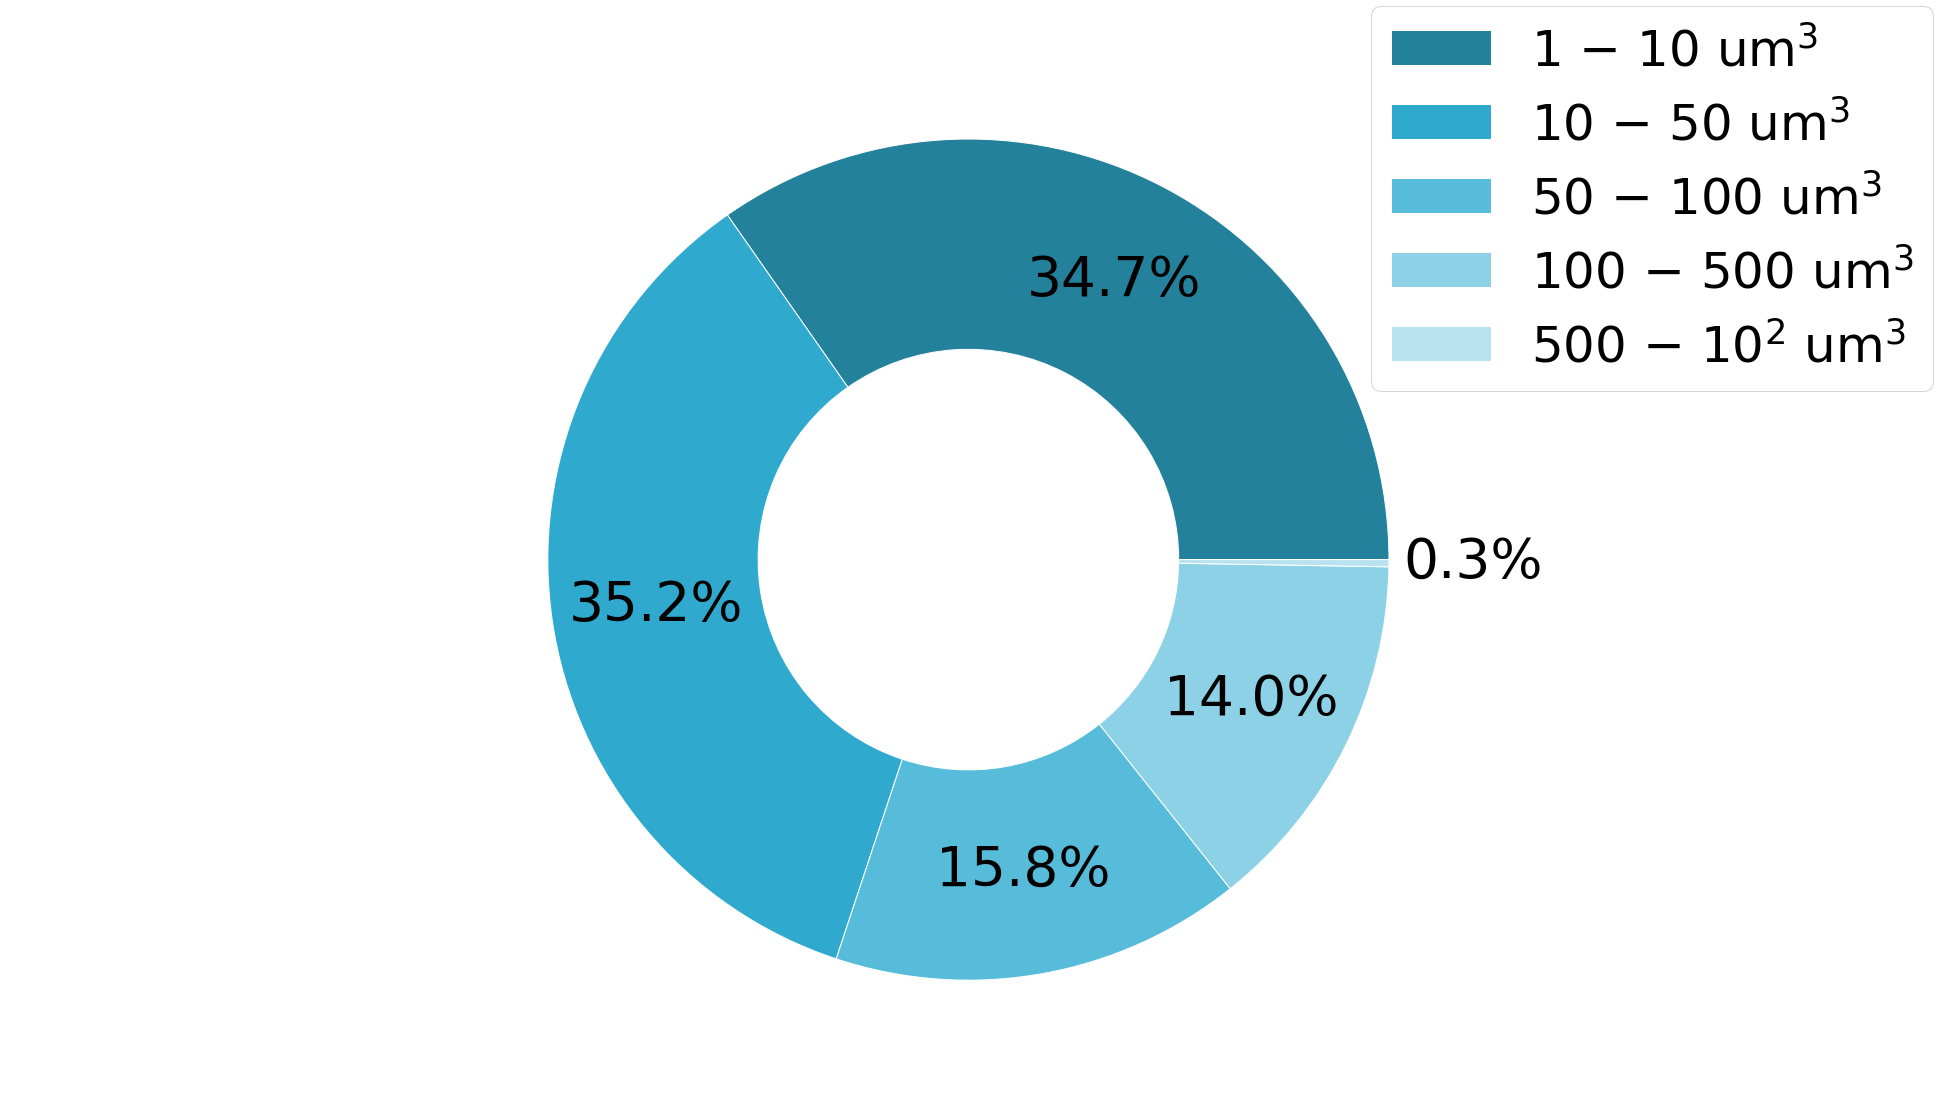

In [57]:
create_pie_chart('B3', './data/heika_bioglass_results', [(1,10),(10,50), (50,100), (100,500), (500,1000)], title='B2', type='p')

Max: 76785202.584, Min: 5.832


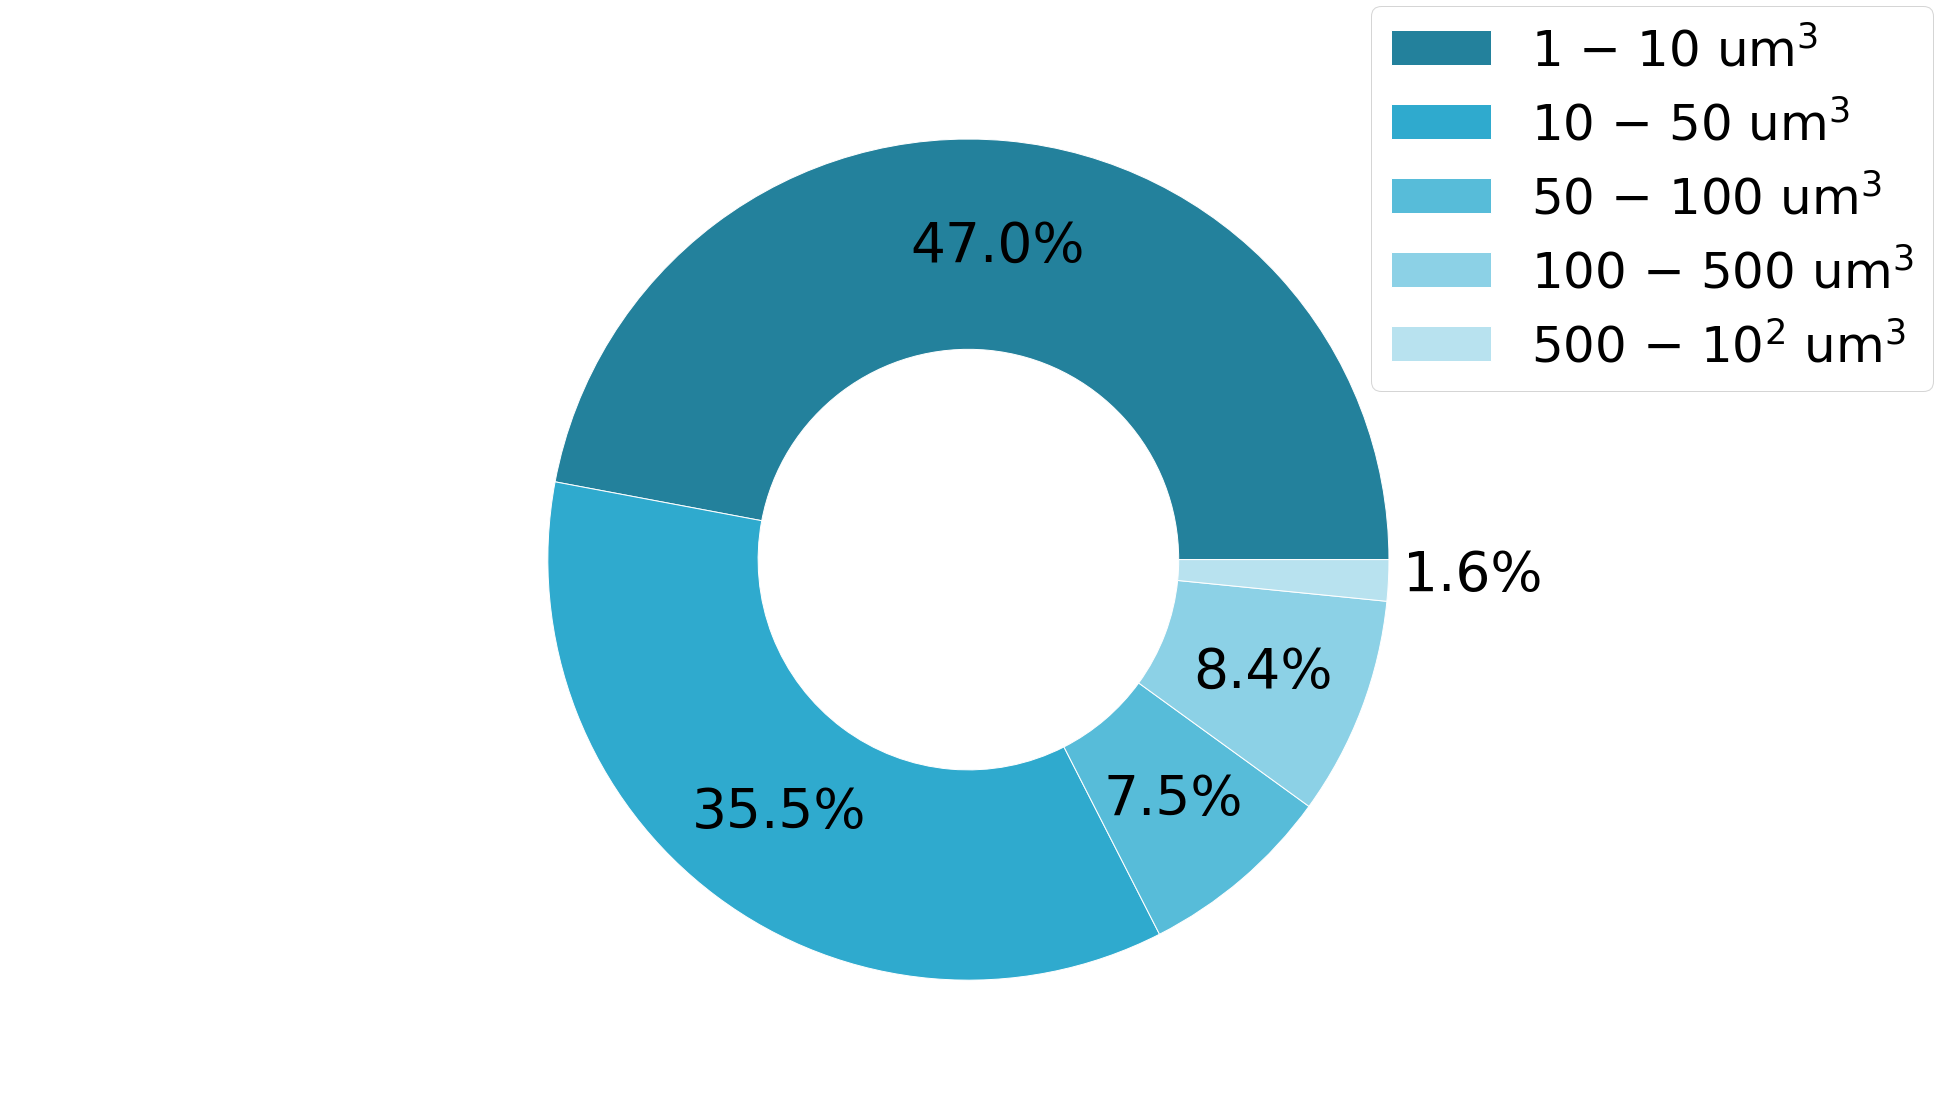

In [58]:
create_pie_chart('B4', './data/heika_bioglass_results', [(1,10),(10,50), (50,100), (100,500), (500,1000)], title='B2', type='p')

Max: 38366558.496, Min: 5.832


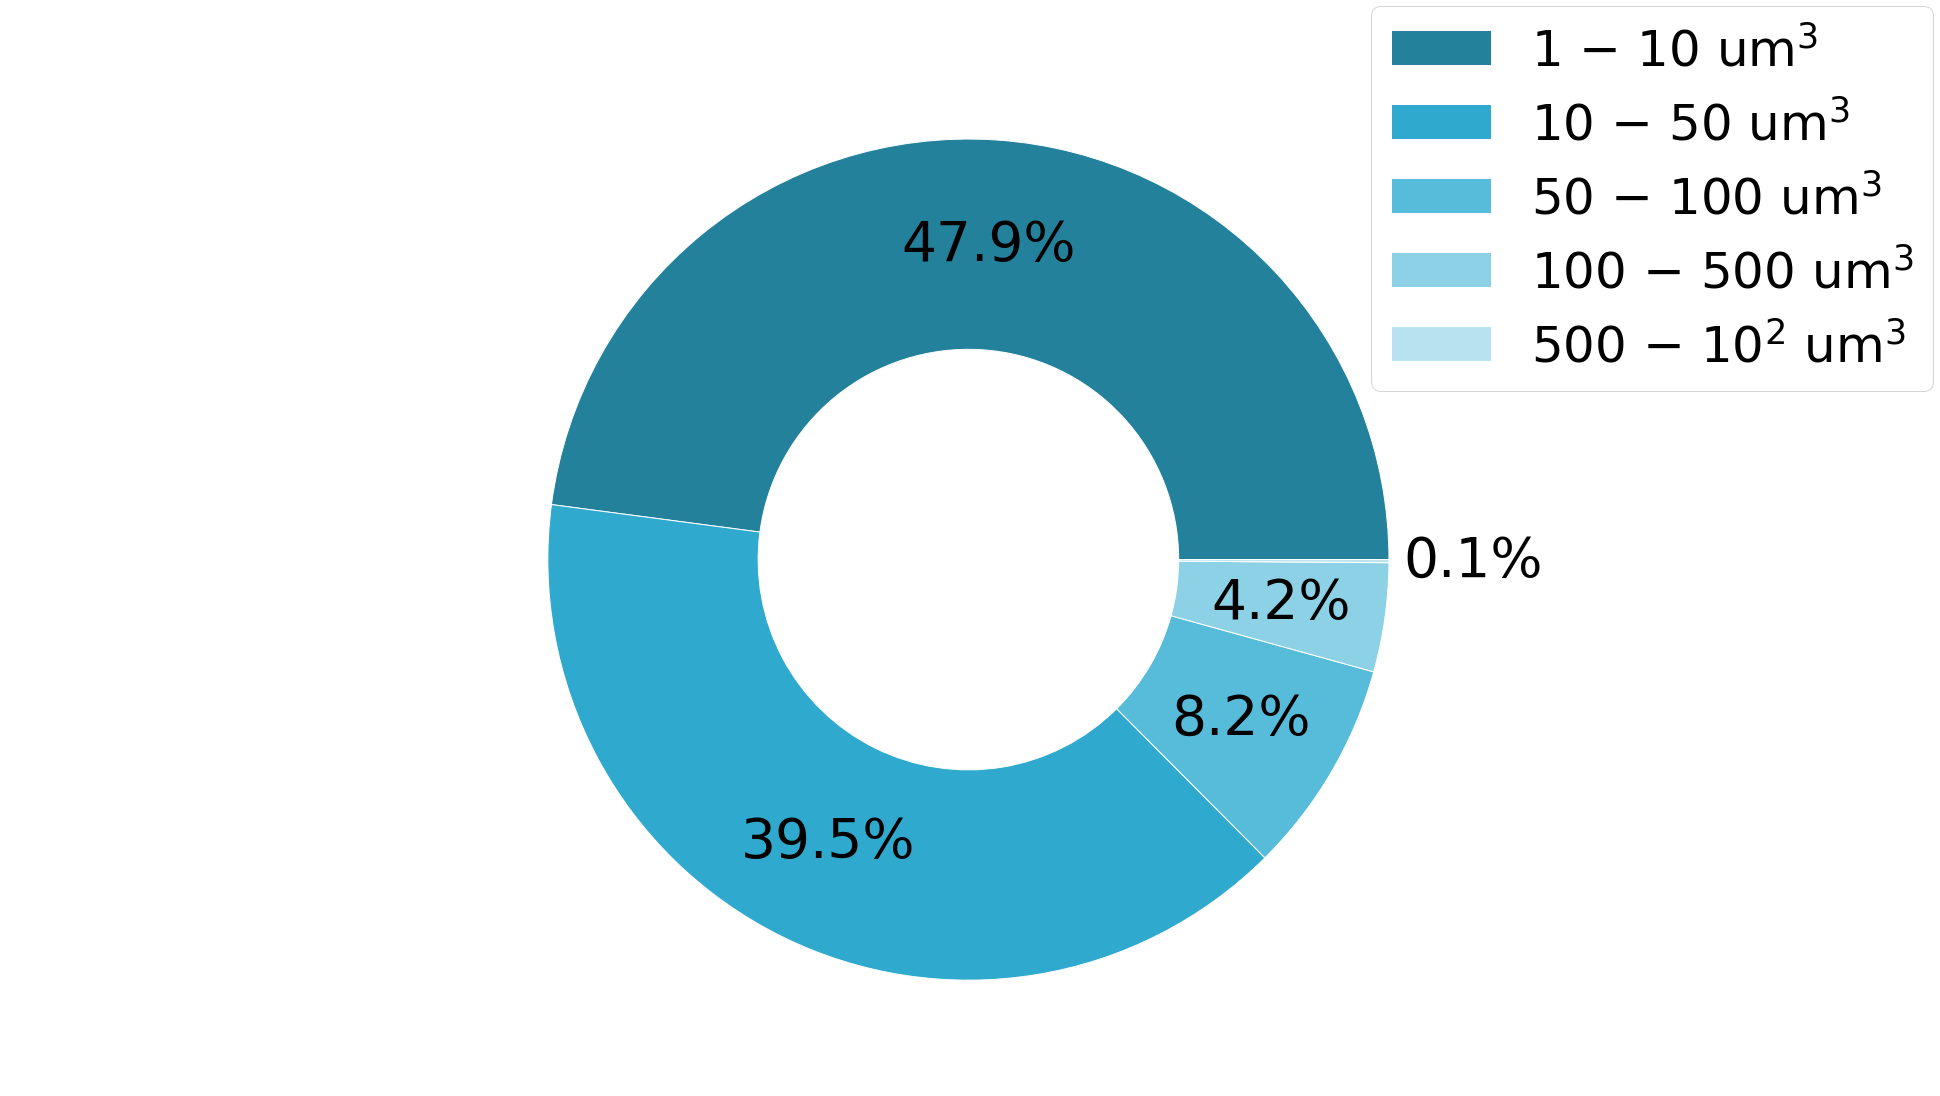

In [59]:
create_pie_chart('B5', './data/heika_bioglass_results', [(1,10),(10,50), (50,100), (100,500), (500,1000)], title='B2', type='p')

Max: 15717368.304, Min: 5.832


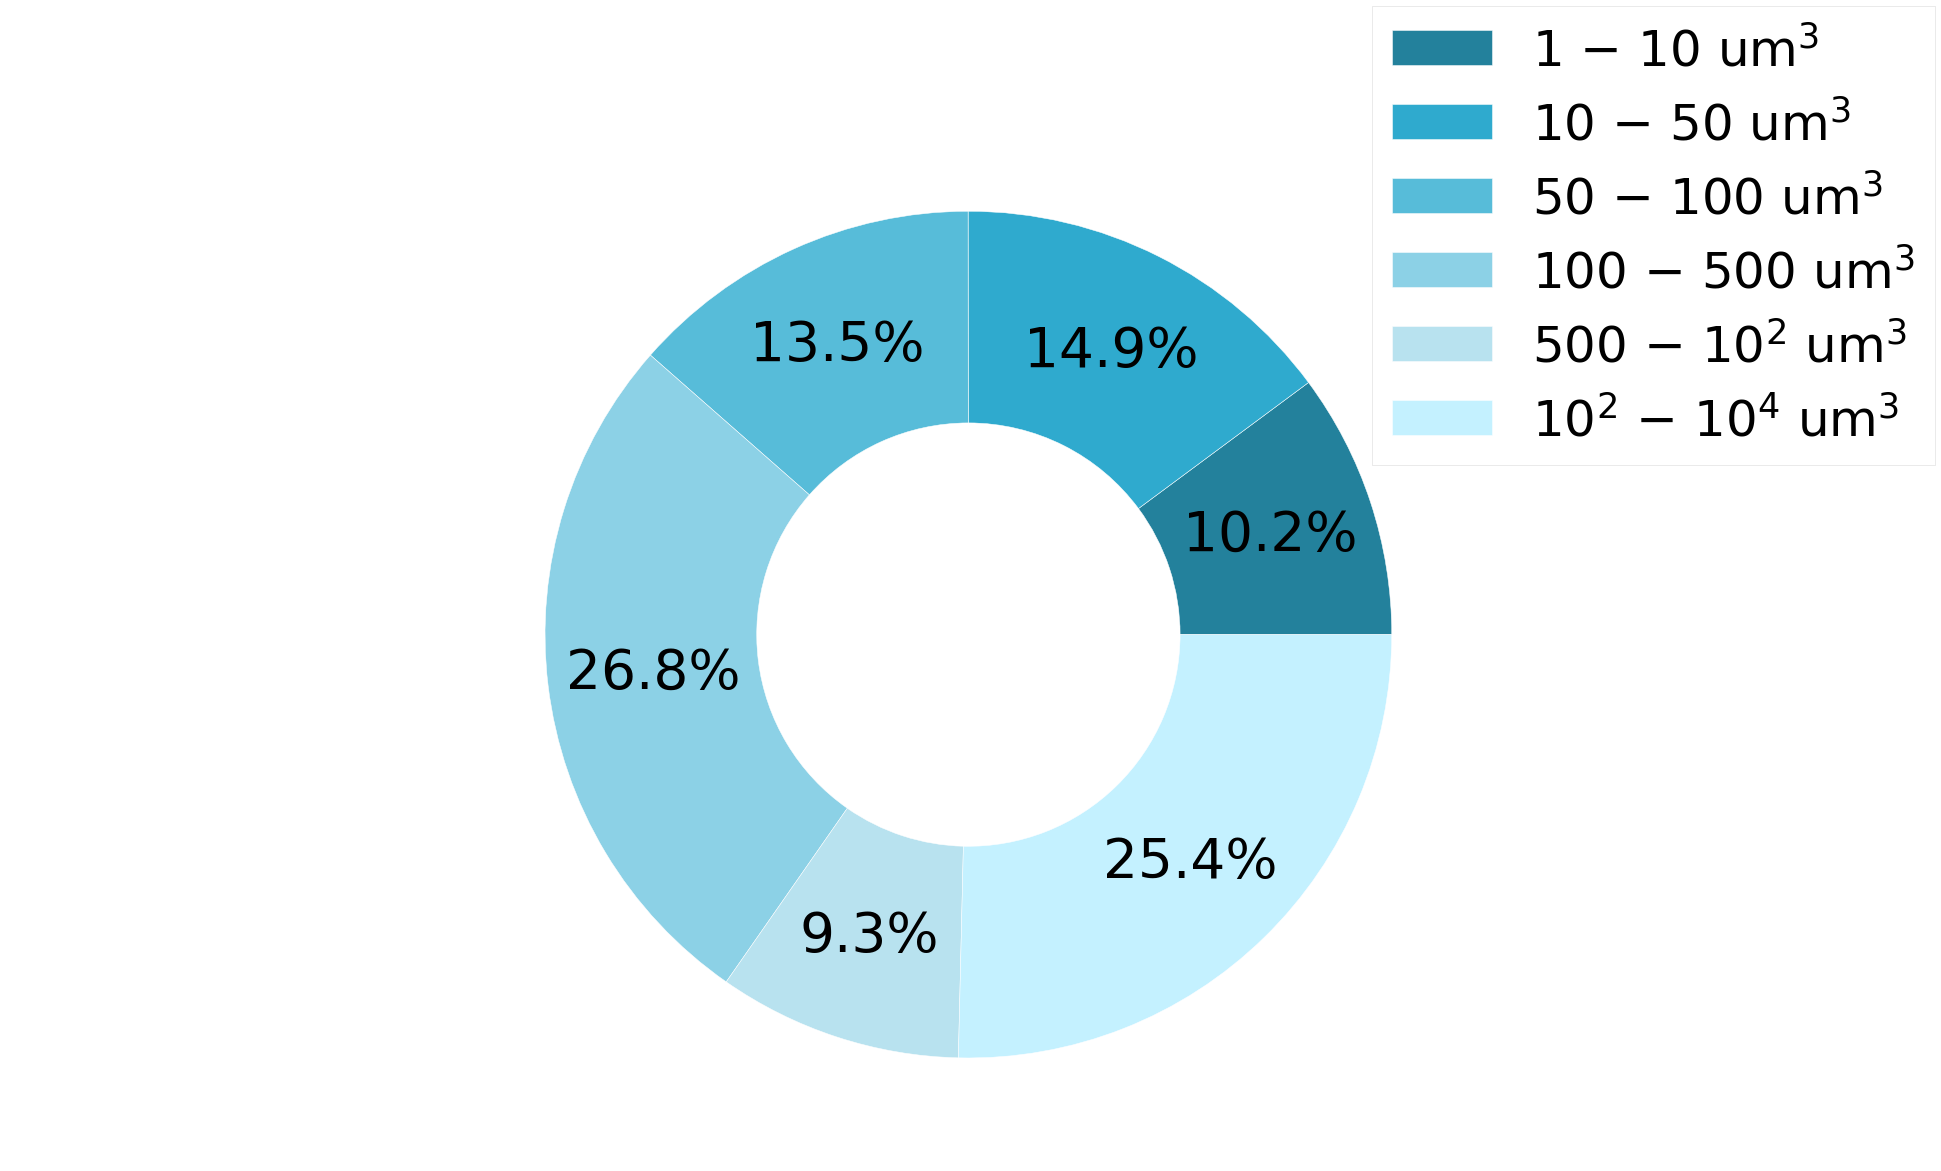

In [30]:
create_pie_chart('S2', './data/heika_bioglass_results', [(1,10),(10,50), (50,100), (100,500), (500,1000), (1000,100000)], title='B2', type='p')